In [77]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
sys.path.append('../')

In [139]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import editdistance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [148]:
import RNA
RAA="UGCA"

In [149]:
from evaluators.Evaluator import Evaluator

In [150]:
from explorers.elitist_explorers import Greedy

In [151]:
greedy_exp= Greedy(recomb_rate=0.1, threshold=0.05, mu=1, virtual_screen=20)


In [152]:
LANDSCAPE_TYPES ={"RNA": "all","TF":"all"} #This will take very long if not parallelized
LANDSCAPE_TYPES ={"RNA": [0,1,2],"TF": []} #for testing


In [153]:
evaluator=Evaluator(greedy_exp,landscape_types=LANDSCAPE_TYPES, path="../simulations/evaluations4/")

loading landscapes RNA: [0, 1, 2], TF:[]
B1L14RNA1 loaded
B1L50RNA1 loaded
B1L100RNA1 loaded
0 TF landscapes loaded.
loading complete


In [154]:
#evaluator.evaluate_for_landscapes(evaluator.adaptivity, num_starts=1)

In [ ]:
evaluator.evaluate_for_landscapes(evaluator.consistency_robustness_independence, num_starts=3)

Running on B1L14RNA1
start seq startRNAL14_0
round: 0, cost: 1, evals: 0, top: 0.5437468768175177
round: 1, cost: 101, evals: 2003, top: 0.7304882670751143
round: 2, cost: 201, evals: 4003, top: 0.7716812138758213
round: 3, cost: 301, evals: 6007, top: 0.8320975044224674
round: 4, cost: 401, evals: 8012, top: 0.8375899182810447
round: 5, cost: 501, evals: 10024, top: 0.8375899182810447
round: 6, cost: 601, evals: 12028, top: 0.8815290196314998
round: 7, cost: 701, evals: 14032, top: 0.8815290196314998
round: 8, cost: 801, evals: 16068, top: 0.889767692798906
round: 9, cost: 901, evals: 18070, top: 0.889767692798906
round: 0, cost: 1, evals: 0, top: 0.5437468768175177
round: 1, cost: 101, evals: 2000, top: 0.7634425930879556
round: 2, cost: 201, evals: 4000, top: 0.8815290196314998
round: 3, cost: 301, evals: 6003, top: 0.889767692798906
round: 4, cost: 401, evals: 8004, top: 0.889767692798906
round: 5, cost: 501, evals: 10014, top: 0.889767692798906
round: 6, cost: 601, evals: 12017, t

In [95]:
data=pd.read_csv("../simulations/evaluations3/consistency_robustness_independence/Greedy_mu1_tr0.05_r0.1_rho1.csv",index_col=False)
data.head()

,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
0,1,AUGGGCGGGAACCC,0.486077,5.787746,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
1,1,GUGGGCAGCACCCC,0.450376,5.100348,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
2,1,AUGGGCGGGACGCC,0.519031,4.480660,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
3,1,CUGGGCCUGACUCC,0.403691,4.055888,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1
4,1,AUGGGCAUGAGCCC,0.508046,3.415833,100,101,2000,B1L14RNA1,startRNAL14_0,NAMb_ss0,20,10,Greedy_mu1_tr0.05_r0.1_rho1


In [128]:
data.landscape_id.unique()

array(['B1L14RNA1', '-1', 'B1L50RNA1', 'B1L100RNA1'], dtype=object)

In [132]:
sub_data=data[(data.model_type.str.startswith("Null"))&(data.batch==1)].iloc[:100]

In [133]:
sub_data

,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
7000,1,AUGGGCCGGAACUC,0.543747,3.971154,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7001,1,CUGAGCCAGAAUGC,0.433899,3.570165,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7002,1,AUGGGCGAGACCCG,0.502554,3.549132,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7003,1,ACGGGCCGGACCCG,0.565716,3.289977,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7004,1,AUAGGCCAGACCCC,0.370737,3.126896,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7005,1,AUGGGCCUGACCGC,0.480584,3.080641,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7006,1,CUGGGCCGGAAGCC,0.642610,3.071320,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7007,1,AAAGGCGGGCACCA,0.403691,3.040683,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7008,1,AUGGGCCGAACCCG,0.480584,2.931028,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1
7009,1,GUGGCCCCGAACCC,0.466853,2.925542,100,101,2006,-1,-1,Null,20,10,Greedy_mu1_tr0.05_r0.1_rho1


In [136]:
sub_data[["true_score","model_score"]].corr("pearson")

,true_score,model_score
true_score,1.000000,0.182337
model_score,0.182337,1.000000


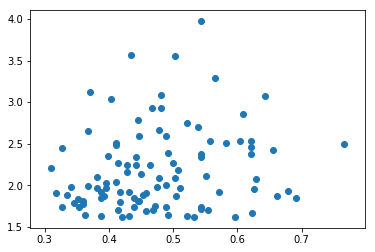

In [137]:
plt.scatter(sub_data["true_score"],sub_data["model_score"])

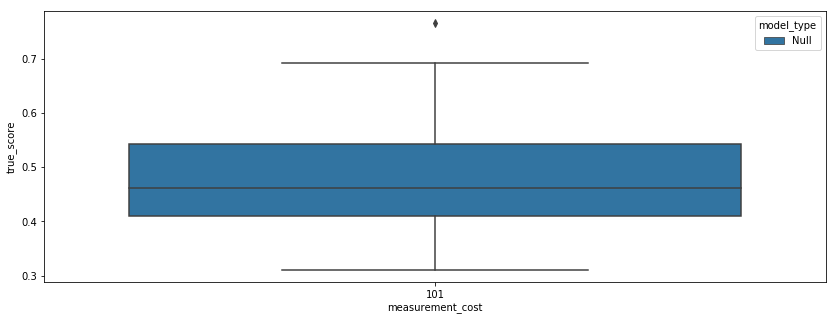

In [138]:
plt.figure(figsize=(14,5))
sns.boxplot(x="measurement_cost",y="true_score",hue="model_type",data=sub_data)

In [16]:
data["start_id"].unique()

array(['                            startRNAL14_0'], dtype=object)

In [ ]:
import timeit

In [ ]:
def get_top_sequence_per_batch(data):
    top_per_batch=[]
    for i in data.batch.unique():
        sub_data=data[data.batch==i] #must also group by model type and landscape id
        #print (sub_data.true_score.max())
        top_per_batch.append(sub_data.true_score.max())
    return (top_per_batch)

200.0